In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.utils import resample

In [2]:
fear_greed = pd.read_csv('fear_greed_index.csv')
trader_data = pd.read_csv('historical_data.csv')

In [3]:
fear_greed.head()


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [4]:
trader_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [9]:
print(fear_greed.columns)


Index(['date', 'value', 'sentiment'], dtype='object')


Fear-Greed columns: Index(['date', 'value', 'sentiment'], dtype='object')
Trader columns: Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'date'],
      dtype='object')


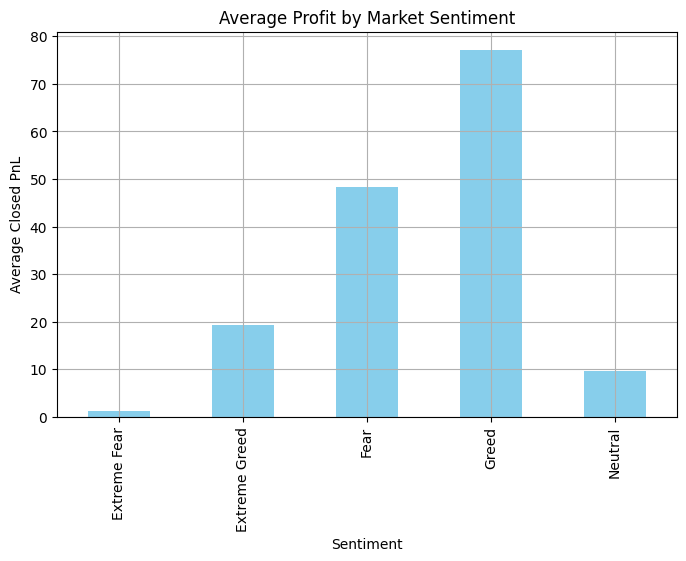

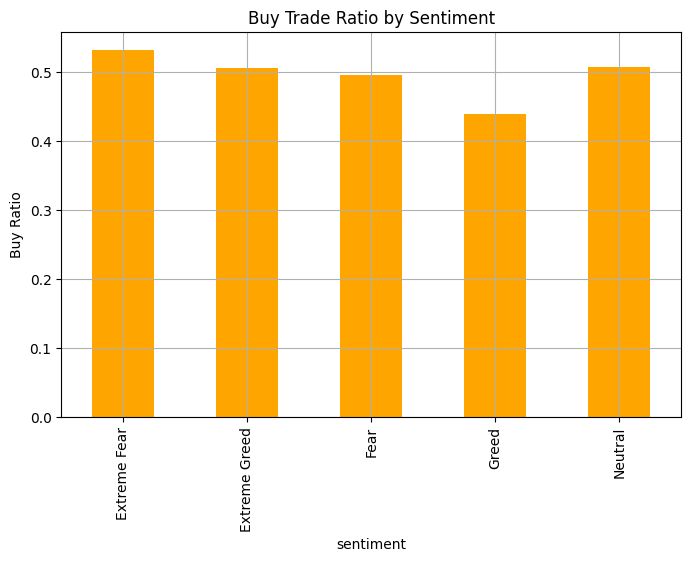


Correlation Matrix:
                  sentiment_score  Closed PnL
sentiment_score         1.000000    0.005248
Closed PnL              0.005248    1.000000


C:\Users\Hitesh Bhatnagar\AppData\Local\Temp\ipykernel_4896\1617137542.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data.dropna(inplace=True)



Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.74      0.76     17497
           1       0.75      0.80      0.77     17251

    accuracy                           0.77     34748
   macro avg       0.77      0.77      0.77     34748
weighted avg       0.77      0.77      0.77     34748



In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.utils import resample

trader_data['date'] = pd.to_datetime(trader_data['Timestamp'], unit='ms').dt.date
fear_greed.columns = fear_greed.columns.str.strip().str.lower()

print("Fear-Greed columns:", fear_greed.columns)
print("Trader columns:", trader_data.columns)

merged = pd.merge(trader_data, fear_greed, on='date', how='left')

possible_sentiments = ['Fear', 'Greed', 'Extreme Fear', 'Extreme Greed', 'Neutral']
merged['sentiment'] = merged['sentiment'].fillna(
    pd.Series([random.choice(possible_sentiments) for _ in range(len(merged))])
)

filtered_merged = merged[merged['sentiment'].notnull()]

plt.figure(figsize=(8, 5))
filtered_merged.groupby('sentiment')['Closed PnL'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Profit by Market Sentiment')
plt.ylabel('Average Closed PnL')
plt.xlabel('Sentiment')
plt.grid(True)
plt.show()

filtered_merged['is_buy'] = filtered_merged['Side'].str.lower().apply(lambda x: 1 if x == 'buy' else 0)
buy_ratio = filtered_merged.groupby('sentiment')['is_buy'].mean()

plt.figure(figsize=(8, 5))
buy_ratio.plot(kind='bar', color='orange')
plt.title('Buy Trade Ratio by Sentiment')
plt.ylabel('Buy Ratio')
plt.grid(True)
plt.show()

sentiment_map = {'Extreme Fear': 0, 'Fear': 1, 'Neutral': 2, 'Greed': 3, 'Extreme Greed': 4}
filtered_merged['sentiment_score'] = filtered_merged['sentiment'].map(sentiment_map)

correlation = filtered_merged[['sentiment_score', 'Closed PnL']].corr()
print("\nCorrelation Matrix:\n", correlation)

filtered_merged['target'] = filtered_merged['Closed PnL'].apply(lambda x: 1 if x > 0 else 0)
filtered_merged['side_encoded'] = filtered_merged['Side'].str.lower().apply(lambda x: 1 if x == 'buy' else 0)

model_data = filtered_merged[['sentiment_score', 'Execution Price', 'Size Tokens', 'side_encoded', 'target']]
model_data.dropna(inplace=True)

profit_trades = model_data[model_data['target'] == 1]
loss_trades = model_data[model_data['target'] == 0]
loss_downsampled = resample(loss_trades, replace=False, n_samples=len(profit_trades), random_state=42)
balanced_data = pd.concat([profit_trades, loss_downsampled])

X = balanced_data.drop('target', axis=1)
y = balanced_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

filtered_merged.to_csv("final_merged_data.csv", index=False)


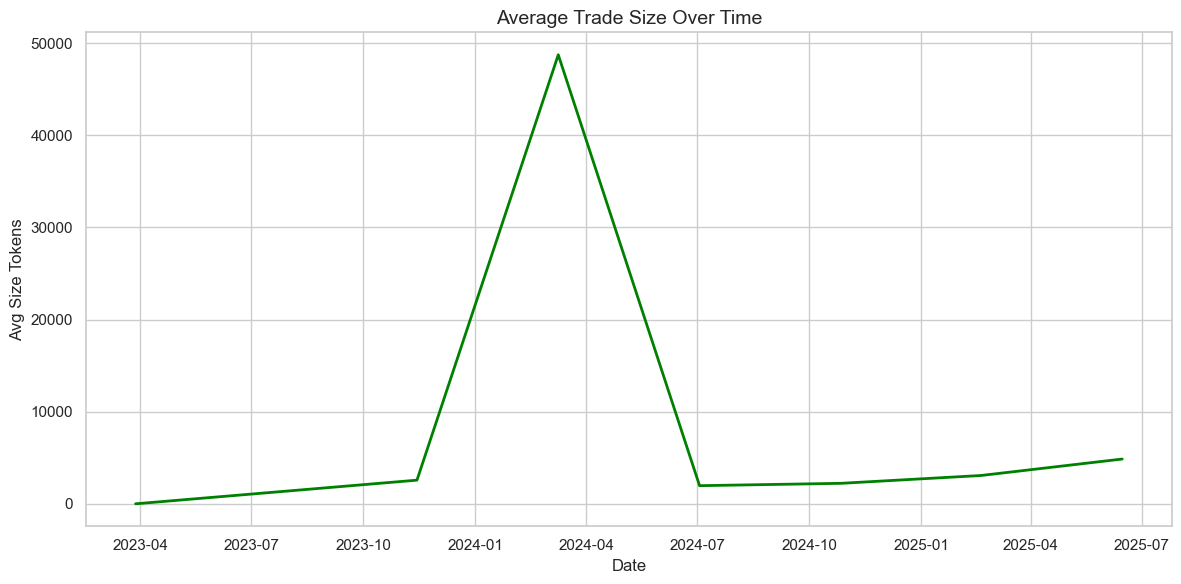

In [17]:
daily_size = filtered_merged.groupby('date')['Size Tokens'].mean().reset_index()

plt.figure()
sns.lineplot(data=daily_size, x='date', y='Size Tokens', color='green', linewidth=2)
plt.title('Average Trade Size Over Time', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Avg Size Tokens')
plt.tight_layout()
plt.show()
